# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso,\
LassoLars, BayesianRidge
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import pickle    # to save and restore models

# for statistical testing
import scipy

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = 1###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
train_df = pd.read_csv('df_train.csv')
pd.set_option("display.max.columns", None)
# Drop 'Unnamed: 0 ' column as it serves no purpose
#train_df.drop('Unnamed: 0', axis= 1, inplace= True)
#pd.set_option("display.max.rows", None)

In [7]:
train_df

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,223.333333,6.333333,42.666667,0.000000,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.000000,800.0,1035.000000,800.000000,1002.666667,274.254667,971.333333,269.888000,269.888000,800.000000,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,221.000000,4.000000,139.000000,0.000000,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.000000,800.0,1035.666667,800.000000,1004.333333,274.945000,972.666667,271.728333,271.728333,800.000000,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,214.333333,2.000000,326.000000,0.000000,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1036.000000,800.000000,1005.333333,278.792000,974.000000,278.008667,278.008667,800.000000,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,199.666667,2.333333,273.000000,0.000000,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1036.000000,800.000000,1009.000000,285.394000,994.666667,284.899552,284.899552,800.000000,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,185.000000,4.333333,260.000000,0.000000,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1035.333333,800.000000,NaN,285.513719,1035.333333,283.015115,283.015115,800.000000,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,226.666667,1.666667,83.666667,45.000000,1.000000,0.0,sp23,0.0,0.0,1021.000000,0.0,0.0,0.0,0.0,727.666667,801.0,1017.666667,769.333333,NaN,285.483333,1024.000000,282.483333,282.483333,802.333333,285.076667,71.333333,282.483333,282.150000,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,220.000000,3.000000,213.333333,85.000000,1.666667,0.0,sp23,0.0,0.0,1019.000000,0.0,0.0,0.0,0.0,762.000000,801.0,1015.333333,803.000000,1021.00

In [4]:
print('There are', len(train_df), 'rows and',train_df.shape[1], 'columns in the train set.')

There are 8763 rows and 49 columns in the train set.


In [12]:
train_df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [8]:
barcelona = train_df[['time','Barcelona_wind_speed','Barcelona_wind_deg','Barcelona_rain_1h',
                'Barcelona_pressure','Barcelona_rain_3h','Barcelona_weather_id',
                'Barcelona_temp_max','Barcelona_temp','Barcelona_temp_min','load_shortfall_3h']]
barcelona


,time,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_rain_1h,Barcelona_pressure,Barcelona_rain_3h,Barcelona_weather_id,Barcelona_temp_max,Barcelona_temp,Barcelona_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,6.333333,42.666667,0.0,1036.333333,0.0,800.0,281.013000,281.013000,281.013000,6715.666667
1,2015-01-01 06:00:00,4.000000,139.000000,0.0,1037.333333,0.0,800.0,280.561667,280.561667,280.561667,4171.666667
2,2015-01-01 09:00:00,2.000000,326.000000,0.0,1038.000000,0.0,800.0,281.583667,281.583667,281.583667,4274.666667
3,2015-01-01 12:00:00,2.333333,273.000000,0.0,1037.000000,0.0,800.0,283.434104,283.434104,283.434104,5075.666667
4,2015-01-01 15:00:00,4.333333,260.000000,0.0,1035.000000,0.0,800.0,284.213167,284.213167,284.213167,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...
8758,2017-12-31 09:00:00,1.666667,83.666667,0.0,1021.000000,0.0,801.0,282.150000,281.276667,280.483333,-28.333333
8759,2017-12-31 12:00:00,3.000000,213.333333,0.0,1019.000000,0.0,801.0,287.816667,287.483333,287.150000,2266.666667
8760,2017-12-31 15:00:00,5.333333,256.666667,0.0,1015.666667,0.0,801.0,290.483333,289.816667,289.150000,822.000000
8761,2017-12-31 18:00:00,5.333333,250.000000,0.0,1015.000000,0.0,800.0,288.150000,287.523333,286.816667,-760.000000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---



All data is in numerical values except for time . First step is to look at the data unlateral


In [24]:
# look at data statistics
barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Barcelona_wind_speed  8763 non-null   float64
 2   Barcelona_wind_deg    8763 non-null   float64
 3   Barcelona_rain_1h     8763 non-null   float64
 4   Barcelona_pressure    8763 non-null   float64
 5   Barcelona_rain_3h     8763 non-null   float64
 6   Barcelona_weather_id  8763 non-null   float64
 7   Barcelona_temp_max    8763 non-null   float64
 8   Barcelona_temp        8763 non-null   float64
 9   Barcelona_temp_min    8763 non-null   float64
 10  load_shortfall_3h     8763 non-null   float64
dtypes: float64(10), object(1)
memory usage: 753.2+ KB


In [9]:
# look at data statistics
barcelona.isna().sum()

time                    0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Barcelona_rain_1h       0
Barcelona_pressure      0
Barcelona_rain_3h       0
Barcelona_weather_id    0
Barcelona_temp_max      0
Barcelona_temp          0
Barcelona_temp_min      0
load_shortfall_3h       0
dtype: int64

This means that there are no null values in Barcelona data. 

In [10]:
# look at data statistics
barcelona.describe()

,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_rain_1h,Barcelona_pressure,Barcelona_rain_3h,Barcelona_weather_id,Barcelona_temp_max,Barcelona_temp,Barcelona_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.870497,190.544848,0.128906,1.377965e+03,0.000439,765.979687,291.157644,289.855459,288.447422,10673.857612
std,1.792197,89.077337,0.634730,1.407314e+04,0.003994,88.142235,7.273538,6.528111,6.102593,5218.046404
min,0.000000,0.000000,0.000000,6.706667e+02,0.000000,200.666667,272.150000,270.816667,269.483333,-6618.000000
25%,1.666667,118.166667,0.000000,1.014000e+03,0.000000,800.000000,285.483333,284.973443,284.150000,7390.333333
50%,2.666667,200.000000,0.000000,1.018000e+03,0.000000,800.333333,290.150000,289.416667,288.150000,11114.666667
75%,4.000000,260.000000,0.000000,1.022000e+03,0.000000,801.000000,296.855000,294.909000,292.966667,14498.166667
max,12.666667,360.000000,12.000000,1.001411e+06,0.093000,804.000000,314.076667,307.316667,304.816667,31904.000000


In [25]:
# look at data statistics
barcelona.skew()

Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Barcelona_rain_1h        8.726988
Barcelona_pressure      57.979664
Barcelona_rain_3h       12.696605
Barcelona_weather_id    -2.584011
Barcelona_temp_max       0.276925
Barcelona_temp           0.128095
Barcelona_temp_min      -0.018057
load_shortfall_3h       -0.384847
dtype: float64

In [26]:
# look at data statistics# look at data statistics (Indicates a lack of outliers for all features.)
barcelona.kurtosis()

Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Barcelona_rain_1h        101.578931
Barcelona_pressure      3687.564230
Barcelona_rain_3h        187.800460
Barcelona_weather_id       5.701882
Barcelona_temp_max        -0.728757
Barcelona_temp            -0.696555
Barcelona_temp_min        -0.474890
load_shortfall_3h         -0.118999
dtype: float64

array([[<AxesSubplot:title={'center':'Barcelona_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_deg'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_1h'}>],
       [<AxesSubplot:title={'center':'Barcelona_pressure'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_3h'}>,
        <AxesSubplot:title={'center':'Barcelona_weather_id'}>],
       [<AxesSubplot:title={'center':'Barcelona_temp_max'}>,
        <AxesSubplot:title={'center':'Barcelona_temp'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_min'}>],
       [<AxesSubplot:title={'center':'load_shortfall_3h'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

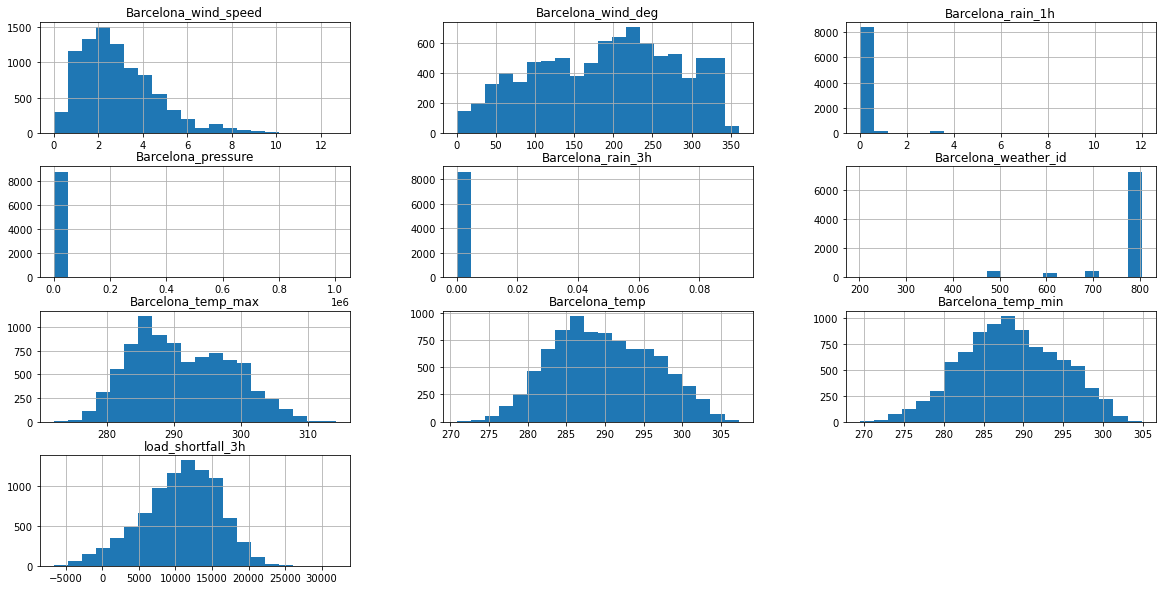

In [12]:
# look at data statistics
barcelona.hist (bins=20,figsize=(20,10))

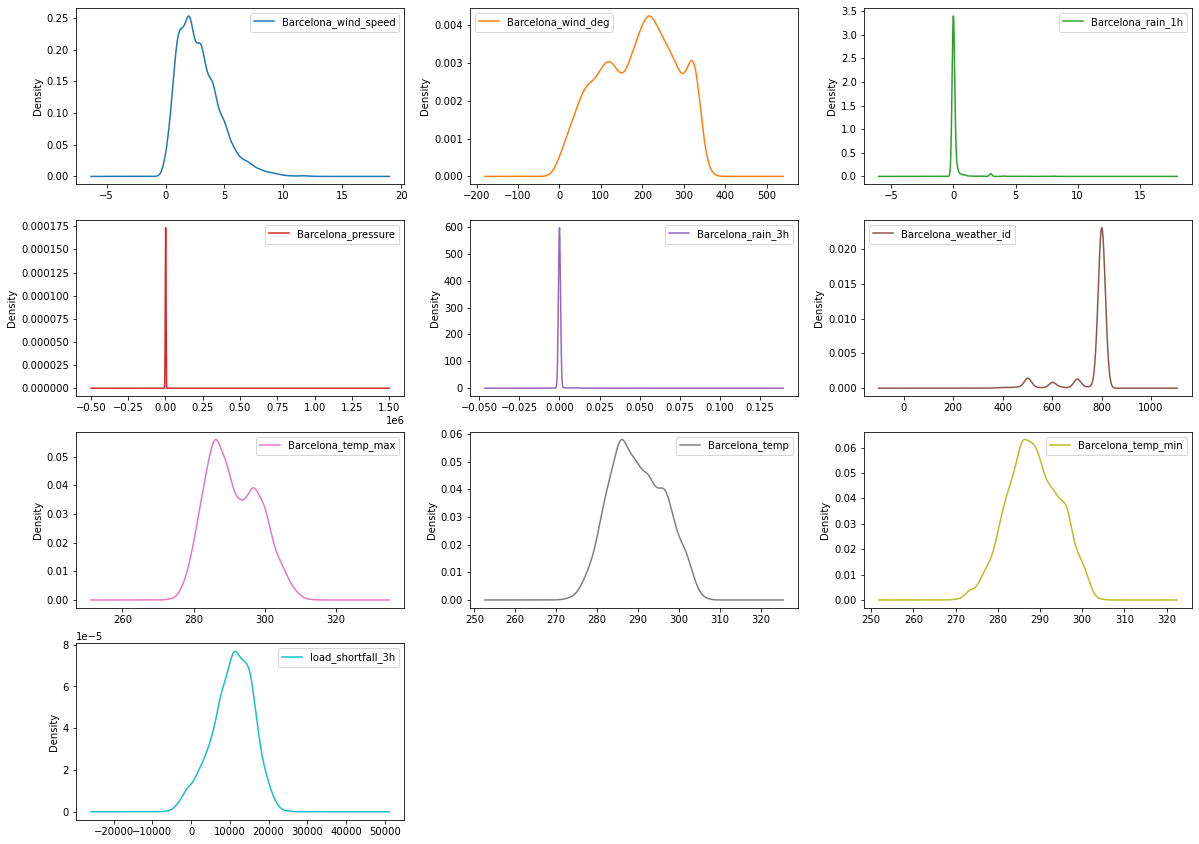

In [22]:
# plot relevant feature interactions
barcelona.plot(kind= 'density', subplots=True, layout=(13,3), sharex= False, figsize= (20,50))
plt.show()

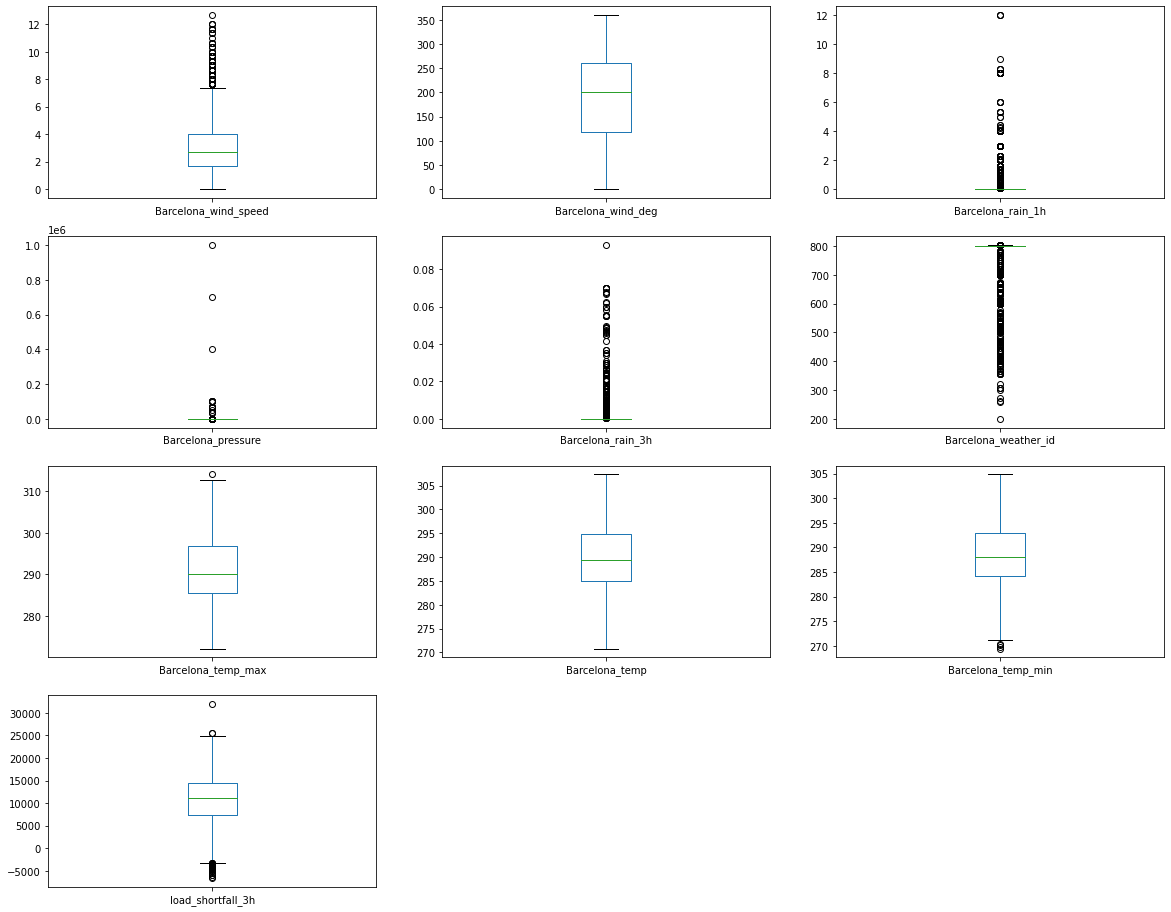

In [23]:
barcelona.plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, figsize= (20,50))
plt.show()

In [27]:
# evaluate correlation
barcelona.corr()

,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_rain_1h,Barcelona_pressure,Barcelona_rain_3h,Barcelona_weather_id,Barcelona_temp_max,Barcelona_temp,Barcelona_temp_min,load_shortfall_3h
Barcelona_wind_speed,1.000000,0.076376,0.042136,0.001280,-0.001722,-0.048004,0.114497,0.116240,0.109268,-0.103633
Barcelona_wind_deg,0.076376,1.000000,-0.037854,-0.001079,-0.011875,0.151534,-0.151302,-0.189016,-0.226583,-0.116133
Barcelona_rain_1h,0.042136,-0.037854,1.000000,0.053550,-0.020084,-0.525751,0.083288,0.060384,0.023582,-0.056633
Barcelona_pressure,0.001280,-0.001079,0.053550,1.000000,-0.002796,-0.013790,-0.034412,-0.033221,-0.029612,-0.034385
Barcelona_rain_3h,-0.001722,-0.011875,-0.020084,-0.002796,1.000000,0.026554,-0.051365,-0.042970,-0.029398,-0.024720
Barcelona_weather_id,-0.048004,0.151534,-0.525751,-0.013790,0.026554,1.000000,0.018332,0.029239,0.046167,0.063868
Barcelona_temp_max,0.114497,-0.151302,0.083288,-0.034412,-0.051365,0.018332,1.000000,0.974480,0.885911,0.164734
Barcelona_temp,0.116240,-0.189016,0.060384,-0.033221,-0.042970,0.029239,0.974480,1.000000,0.964089,0.182673
Barcelona_temp_min,0.109268,-0.226583,0.023582,-0.029612,-0.029398,0.046167,0.885911,0.964089,1.000000,0.195984
load_shortfall_3h,-0.103633,-0.116133,-0.056633,-0.034385,-0.024720,0.063868,0.164734,0.182673,0.195984,1.000000


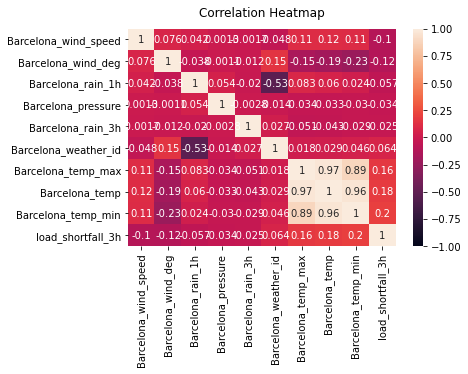

In [28]:
# evaluate correlation
heatmap = sns.heatmap(barcelona.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# evaluate correlation


In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic